<a href="https://colab.research.google.com/github/jw161063/Woody-Physics2/blob/main/Fast_capacitors_charge_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

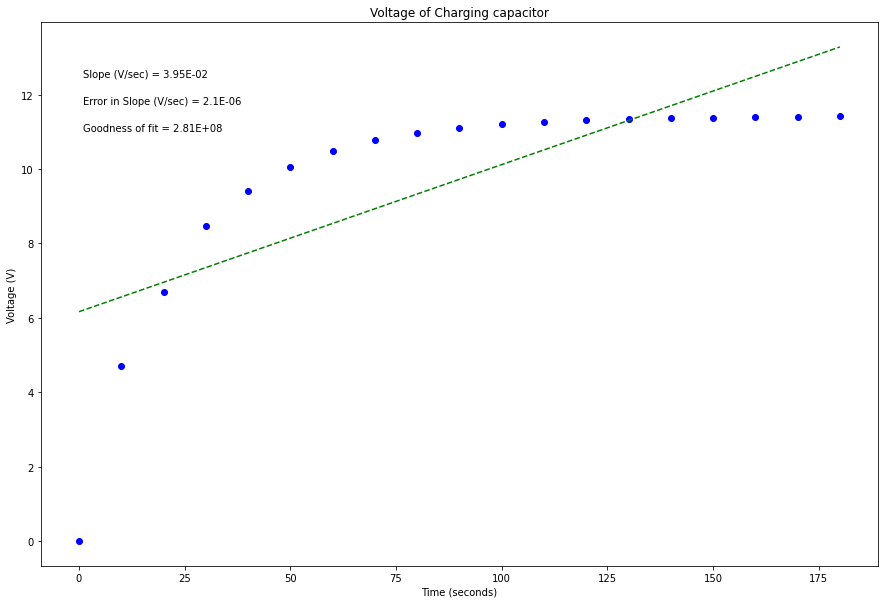

In [1]:
#PHSX 216 & 218 plotting code
#Justin Woody
#Updated February 2023

#import packages and libraries, assign shortcut names
%matplotlib inline
from __future__ import division #only used if running python 2
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations.
#CHANGE THE VARIABLE NAMES and numbers to match your data

xvariable_changeme = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180]) #what are units?
yvariable_changeme = np.array([0,4.704,6.7,8.46,9.41,10.06,10.49,10.78,10.97,11.1,11.2,11.26,11.31,11.34,11.36,11.38,11.4,11.41,11.42]) #what are units?


#-----------------------------------------------------------------------#
#Create array for uncertainties in y variable
#CHANGE THE VARIABLE NAME and numbers to match your data 

err_yvariable_changeme = np.array([0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,.0005])


#-----------------------------------------------------------------------#
#--------------------------Plotting Code Below--------------------------#
#-----------------------------------------------------------------------#

#UPDATE THIS SECTION!!!

#Re-assign variables as x, y, dy so that the remaining plotting code may remain generic
x = xvariable_changeme             #this should be the array you want to plot on the x axis
y = yvariable_changeme             #this should be the array you want to plot on the y axis
dy = err_yvariable_changeme        #this should be your error in y array


#update each of these 4 strings
plot_title= 'Voltage of Charging capacitor'
x_label= 'Time (seconds)'
y_label= 'Voltage (V)'
slope_units= 'V/sec'

#update annotation placement with integer from 1 to 4, top R corner is 1 (counter-clockwise from there)
annotation_placement=2 


#-----------------------------------------------------------------------#
#Don't need to change anything in this section!

#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" using linear least squares fitting
#(the closer to 0, the better the fit)
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#assign annotation positions based on annotation_placement value
if annotation_placement==2 or annotation_placement==3:
    xpos=0.05
elif annotation_placement==1 or annotation_placement==4:
    xpos=0.75

if annotation_placement==1 or annotation_placement==2:
    ypos=[.9,.85,.8]
elif annotation_placement==3 or annotation_placement==4:
    ypos=[.2,.15,.1]
    
#-----------------------------------------------------------------------#
#Don't need to change anything in this section!

#Plot data on graph. Plot error bars and place values for slope, 
#error in slope and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope ({}) = {value:.{digits}E}'.format(slope_units,value=m, digits=2),
             (xpos, ypos[0]), xycoords='axes fraction')
 
plt.annotate('Error in Slope ({}) = {value:.{digits}E}'.format(slope_units,value=dm, digits=1),
             (xpos, ypos[1]), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (xpos, ypos[2]), xycoords='axes fraction')

plt.show()